In [ ]:
#|default_exp bldg_ftp

# Buildings datasets

In [1]:
#|hide
from nbdev.showdoc import *

In [3]:
#|hide
#|export

import geopandas as gpd
import seaborn as sns
from shapely.geometry import Point
import json
import ee
import geemap
from datetime import datetime

ee.Authenticate()
ee.Initialize(project='ee-reutkeller')

from gee_projects import util_func as utils

Open Buildings V3 Polygons

In [56]:
#|export


def access_v3_bldgs(
    path_geometry : str , #path to geometry, add r before
    crs : str ='4326',  # define crs 
    ):
  
  gdf = utils.read_gdf(geometry_path=path_geometry,crs=crs)
  
  fc = utils.gdf_to_featureCollection(gdf)

  buildings_v3 = ee.FeatureCollection('GOOGLE/Research/open-buildings/v3/polygons')
  
  clipped_buildings = buildings_v3.filterBounds(fc.geometry())

  gdf_results = geemap.ee_to_geopandas(clipped_buildings)

  return gdf_results

  



<>:4: SyntaxWarning: invalid escape sequence '\g'
<>:4: SyntaxWarning: invalid escape sequence '\g'
C:\Users\USER\AppData\Local\Temp\ipykernel_17428\3472835756.py:4: SyntaxWarning: invalid escape sequence '\g'
  gdf_results.to_file("D:\git\gee_projects\nbs\geometry\fid1Result.shp")
C:\Users\USER\AppData\Local\Temp\ipykernel_17428\3472835756.py:4: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_results.to_file("D:\git\gee_projects\nbs\geometry\fid1Result.shp")
C:\Users\USER\AppData\Local\Temp\ipykernel_17428\3472835756.py:4: SyntaxWarning: invalid escape sequence '\g'
  gdf_results.to_file("D:\git\gee_projects\nbs\geometry\fid1Result.shp")


DriverIOError: Failed to create file D:\git\gee_projects bs\geometryid1Result.shp: No error

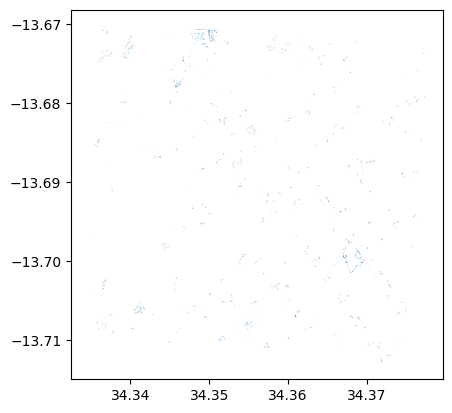

In [65]:
gdf_results = access_v3_bldgs(path_geometry= r"D:\projects\tembo\geometry\geometry_per_bbox\fid_1.gpkg")
gdf_results = gdf_results[["geometry" , "area_in_meters" , "confidence"]]
gdf_results.plot()
gdf_results.to_file("D:\projects\tembo\geometry\external\googleV3\fid1.shp")

In [62]:
gdf_results[["geometry" , "area_in_meters" , "confidence"]]

,geometry,area_in_meters,confidence
0,"POLYGON ((34.36093 -13.69331, 34.36093 -13.693...",6.074100,0.6875
1,"POLYGON ((34.34314 -13.68662, 34.34309 -13.686...",34.404900,0.8125
2,"POLYGON ((34.35491 -13.70809, 34.35487 -13.708...",59.960300,0.8750
3,"POLYGON ((34.33847 -13.68254, 34.33843 -13.682...",21.716400,0.7556
4,"POLYGON ((34.34047 -13.67262, 34.34046 -13.672...",46.792999,0.7556
...,...,...,...
1775,"POLYGON ((34.34795 -13.69307, 34.34795 -13.693...",29.487101,0.8013
1776,"POLYGON ((34.35966 -13.67333, 34.35966 -13.673...",7.095900,0.6707
1777,"POLYGON ((34.37385 -13.69507, 34.37382 -13.695...",30.181000,0.7957
1778,"POLYGON ((34.36874 -13.69901, 34.36871 -13.698...",41.271900,0.8582
